Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [40]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
dataset = pd.DataFrame(housing.data,columns=housing.feature_names)
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
# combine independent variables(features) with dependent variable(target)
# so here, i have to mix feature variables with target variable
dataset['Price'] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
#checking if the dataset has any null value
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [10]:
#diving dependent and independent features
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]


In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
#creating train test split from scratch

# def train_test_split(dataset,test_ratio):
#     shuffled_indices = np.random.permutation(len(dataset))
#     testset_size= int(len(dataset)*test_ratio)
#     testset_indices = shuffled_indices[:testset_size]
#     trainset_indices = shuffled_indices[testset_size:]
#     return dataset.iloc[testset_indices],dataset.iloc[trainset_indices]
# test_set,train_set=train_test_split(dataset,0.2)
# print(len(test_set),len(train_set))


In [13]:
#using scikit learn to for splitting data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=45)
print(f'X_train=',len(X_train))
print(f'X_test=',len(X_test))
print(f'Y_train=',len(Y_train))
print(f'Y_test=',len(Y_test))


X_train= 15480
X_test= 5160
Y_train= 15480
Y_test= 5160


In [14]:
# standerdizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# create a pickle file of scaler function to use this file in webapplication to preprocess the data

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

# model training

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [16]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
## prediction with test data
reg_predict=regression.predict(X_test)
reg_predict

array([1.39731629, 1.70049374, 2.32733562, ..., 1.90091688, 2.16429051,
       3.92067426], shape=(5160,))

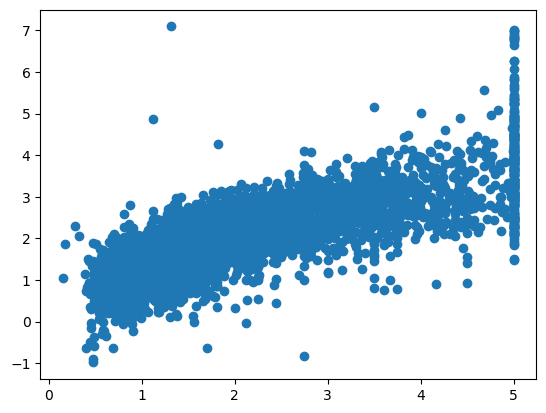

In [21]:
#plot a scatter plot for prediction
plt.scatter(Y_test,reg_predict)

In [22]:
residuals = Y_test-reg_predict
residuals

3046    -0.739316
6803     0.583506
10112    0.083664
3126     0.382084
5008    -0.384841
           ...   
5461     1.295577
11345   -0.745632
9469    -0.842917
4025     0.273709
18082    1.079336
Name: Price, Length: 5160, dtype: float64

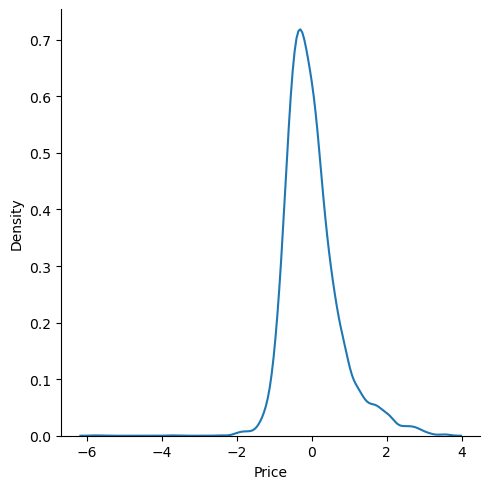

In [25]:
import seaborn as sns
sns.displot(residuals,kind='kde')

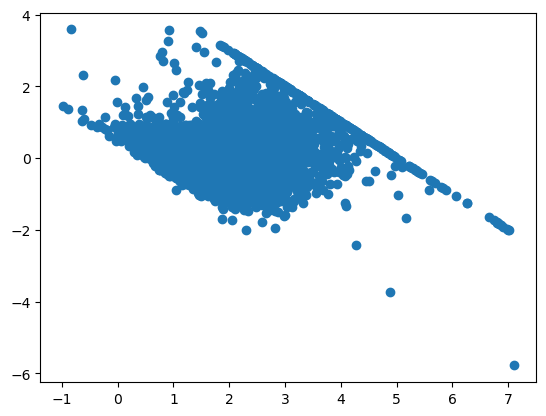

In [26]:
## scater plot with respect to prediction and residuals
plt.scatter(reg_predict,residuals)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,reg_predict))
print(mean_squared_error(Y_test,reg_predict))

0.5319622386699497
0.5248542632112426


# creating a pickle file for deployment


In [29]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))

In [35]:
#loading the pickel file and running a random datapoint to predict
pickled_model = pickle.load(open('regmodel.pkl','rb'))
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

c:\Users\PC\anaconda3\envs\boston_housing\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.12195858])